In [2]:
import sys
import os
import json

import pyspark
import datetime
from pyspark.sql import *
import pyspark.sql.functions as F
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
tones_df = spark.read.parquet("tone_mean_count.parquet")

In [5]:
import pandas 

/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
import matplotlib.pyplot as plt

In [7]:
tones = tones_df.toPandas()

In [8]:
tones.head()

,day,month,year,tone_mean
0,18.0,5.0,2015.0,-1.985123
1,3.0,4.0,2015.0,-2.252133
2,8.0,6.0,2015.0,-2.145932
3,24.0,8.0,2016.0,-2.270317
4,25.0,10.0,2017.0,-2.197027


In [9]:
tones['datetime'] = pandas.to_datetime(tones[['year','month','day']])

In [10]:
tones = tones.sort_values(by='datetime') 

In [11]:
tones.head()

,day,month,year,tone_mean,datetime
902,18.0,2.0,2015.0,-2.893717,2015-02-18
566,19.0,2.0,2015.0,-2.197792,2015-02-19
672,20.0,2.0,2015.0,-2.299991,2015-02-20
594,21.0,2.0,2015.0,-2.094941,2015-02-21
57,22.0,2.0,2015.0,-2.017214,2015-02-22


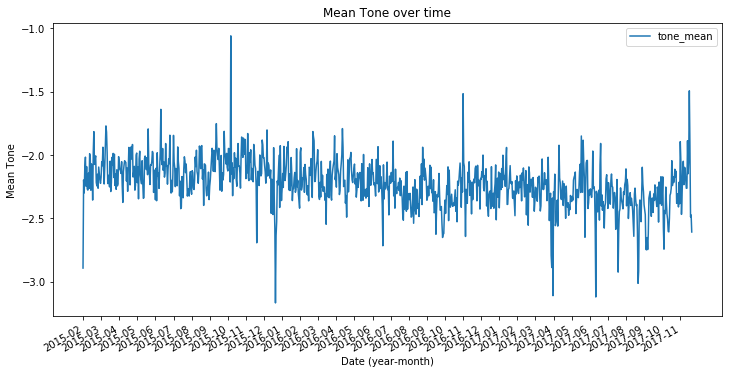

In [12]:
tones.plot('datetime','tone_mean',figsize=(12,6))
# display a label every month
ticks = tones.datetime.values[0::30]
labels = [str(t).split('-')[0] + "-" + str(t).split('-')[1] for t in ticks]
plt.xticks(ticks, labels)
plt.xlabel("Date (year-month)")
plt.ylabel("Mean Tone")
plt.title("Mean Tone over time")
plt.show()